In [233]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import scipy
from scipy.stats import pearsonr


In [244]:
P = pd.read_table('cryptocurrency_prices.txt',header = None) # header = None 不把第一行当作列名

In [7]:
P = np.array(P)

In [12]:
P

array([[2.79580e+02, 2.61000e+02, 2.65080e+02, ..., 1.05518e+04,
        1.12253e+04, 1.14037e+04],
       [3.26000e+00, 3.08000e+00, 3.11000e+00, ..., 6.89280e+02,
        7.28730e+02, 6.85040e+02],
       [2.77000e+00, 7.53325e-01, 7.01897e-01, ..., 9.23920e+02,
        9.43870e+02, 8.95370e+02],
       ...,
       [7.42292e-01, 6.76046e-01, 6.74739e-01, ..., 3.00120e+02,
        3.16490e+02, 3.04400e+02],
       [1.45000e-04, 1.36000e-04, 1.30000e-04, ..., 5.30407e-01,
        5.29261e-01, 4.84397e-01],
       [8.15200e-03, 8.47600e-03, 8.80800e-03, ..., 1.12000e+00,
        1.14000e+00, 1.09000e+00]])

In [8]:
len(P)

7

In [18]:
# building log returns
R = []
for i in range(len(P)):
    R.append(np.log((P[i, 1:]) / P[i, 0 : -1]))


In [19]:
R

[array([-6.87680697e-02,  1.55112599e-02, -2.30384390e-03,  2.21375379e-02,
        -1.49415005e-02, -8.67177323e-03,  6.04048952e-03, -1.56671073e-02,
        -1.16910919e-02, -2.05231538e-03, -2.00644854e-01,  7.13021228e-02,
         3.75344365e-02, -1.18825129e-02, -9.41772988e-03, -9.68255994e-03,
        -8.06053120e-02,  5.14334271e-02,  1.88634236e-02, -4.70484667e-03,
         2.90701576e-02, -7.02548533e-03, -4.44891038e-03,  5.66672542e-03,
        -8.46833818e-03,  5.07215779e-03, -9.20130928e-03,  1.36401520e-02,
         2.02878101e-02,  2.03014174e-02,  4.16935938e-05,  1.55548579e-02,
        -2.25838815e-02,  1.30074496e-03,  6.81170230e-03, -2.05333928e-02,
        -2.02695135e-02,  5.63807887e-04, -1.47524650e-03, -5.26786738e-03,
         3.13794112e-03,  1.36568093e-02, -6.37301386e-03, -1.21028759e-03,
        -1.79799738e-02,  1.54249197e-02, -1.47537454e-03,  1.82875517e-02,
         2.59756997e-03, -3.40802920e-03, -6.76517245e-03,  2.70412747e-02,
        -1.0

In [24]:
N = len(R) # number of variables
T = len(R[0]) #depth of time series

# Building correlation matrix

In [32]:
#Standardizing data by subtracting mean and dividing by std. dev.
X = []
R = np.array(R)
for i in range(N):
    X.append((R[i,:] - np.mean(R[i, :])) / np.std(R[i,:]))

In [33]:
X

[array([-1.77337277e+00,  2.80641121e-01, -1.53539725e-01,  4.42133472e-01,
        -4.61538403e-01, -3.08735730e-01,  4.98242175e-02, -4.79222530e-01,
        -3.82321062e-01, -1.47409597e-01, -4.98740814e+00,  1.64034827e+00,
         8.17379024e-01, -3.86986279e-01, -3.26915814e-01, -3.33370121e-01,
        -2.06186415e+00,  1.15611831e+00,  3.62338387e-01, -2.12055770e-01,
         6.11091829e-01, -2.68613221e-01, -2.05818218e-01,  4.07150247e-02,
        -3.03777712e-01,  2.62245183e-02, -3.21641319e-01,  2.35039411e-01,
         3.97052825e-01,  3.97384457e-01, -9.63754522e-02,  2.81703671e-01,
        -6.47794711e-01, -6.56904786e-02,  6.86198316e-02, -5.97821220e-01,
        -5.91390085e-01, -8.36507424e-02, -1.33345561e-01, -2.25777430e-01,
        -2.09152479e-02,  2.35445375e-01, -2.52711511e-01, -1.26888115e-01,
        -5.35590563e-01,  2.78536880e-01, -1.33348682e-01,  3.48303522e-01,
        -3.40849049e-02, -1.80450380e-01, -2.62269005e-01,  5.61644905e-01,
        -3.4

In [49]:
X_df = np.asmatrix(X)

In [50]:
C = X_df * X_df.T / T

In [51]:
C

matrix([[1.        , 0.3734347 , 0.28667697, 0.54853037, 0.41659218,
         0.33021194, 0.2158881 ],
        [0.3734347 , 1.        , 0.2725163 , 0.34830833, 0.39748623,
         0.26710584, 0.14518249],
        [0.28667697, 0.2725163 , 1.        , 0.27017782, 0.28110743,
         0.19434073, 0.13191029],
        [0.54853037, 0.34830833, 0.27017782, 1.        , 0.34858713,
         0.32913021, 0.27703643],
        [0.41659218, 0.39748623, 0.28110743, 0.34858713, 1.        ,
         0.25076676, 0.21145711],
        [0.33021194, 0.26710584, 0.19434073, 0.32913021, 0.25076676,
         1.        , 0.23594052],
        [0.2158881 , 0.14518249, 0.13191029, 0.27703643, 0.21145711,
         0.23594052, 1.        ]])

In [52]:
pd.DataFrame(C)

,0,1,2,3,4,5,6
0,1.000000,0.373435,0.286677,0.548530,0.416592,0.330212,0.215888
1,0.373435,1.000000,0.272516,0.348308,0.397486,0.267106,0.145182
2,0.286677,0.272516,1.000000,0.270178,0.281107,0.194341,0.131910
3,0.548530,0.348308,0.270178,1.000000,0.348587,0.329130,0.277036
4,0.416592,0.397486,0.281107,0.348587,1.000000,0.250767,0.211457
5,0.330212,0.267106,0.194341,0.329130,0.250767,1.000000,0.235941
6,0.215888,0.145182,0.131910,0.277036,0.211457,0.235941,1.000000


In [240]:
# another way to compute correlation matrix
pd.DataFrame(X).T.corr(method='pearson', min_periods=1) #method = 'spearman'

,0,1,2,3,4,5,6
0,1.000000,0.373435,0.286677,0.548530,0.416592,0.330212,0.215888
1,0.373435,1.000000,0.272516,0.348308,0.397486,0.267106,0.145182
2,0.286677,0.272516,1.000000,0.270178,0.281107,0.194341,0.131910
3,0.548530,0.348308,0.270178,1.000000,0.348587,0.329130,0.277036
4,0.416592,0.397486,0.281107,0.348587,1.000000,0.250767,0.211457
5,0.330212,0.267106,0.194341,0.329130,0.250767,1.000000,0.235941
6,0.215888,0.145182,0.131910,0.277036,0.211457,0.235941,1.000000


# Testing statistical significance of correlations

In [77]:
Nsamples = 100 # % Number of times correlation between reshuffled returns are computed for each pair of currencies
coeff = []
X = np.array(X)
J_list = [1,2,3,4,5,6]
for i in range(N):
    for j in J_list:
        aux = []
        for ns in range(Nsamples):
            aux.append(sum(X[i,np.random.permutation(T)] * X[j, np.random.permutation(T)])/T) #Computing correlation on randomly reshuffled returns
#         coeff.append()


In [79]:
np.random.permutation(T)

array([138, 354, 606, 815, 164, 399,  95, 194, 897, 631, 123, 855, 293,
       786, 330,   6, 670, 274, 335, 919, 733, 814, 798, 101, 492, 435,
       463, 710, 261,  26, 389, 766, 503, 888, 738, 517, 885, 811, 658,
       784, 306, 323, 828, 869, 290, 255, 405, 579, 219, 677, 752, 481,
       126, 917, 694, 802, 246, 542, 674, 916, 695, 373,  37,  19, 465,
         3, 790, 171, 603, 173, 835, 629,  61, 611, 440, 898, 807, 318,
       715, 174, 704, 553, 557, 594, 301, 414, 560, 366, 826, 890, 581,
        56, 322, 753, 909, 460, 125, 152, 453, 692, 532, 605, 476, 501,
       298, 669, 210, 341, 666, 135, 875, 783, 816, 493, 143, 199,  68,
       857, 266,   7, 595, 880, 906, 927, 748, 722, 642, 706, 841, 358,
       725, 562, 635, 129, 863, 212, 509, 556, 483, 139, 262, 923, 620,
       218, 653, 156, 818,  71, 756, 208, 876, 386,   0, 700, 459, 849,
       809, 672,  85, 896, 803, 364, 309, 588, 531,   9,  39, 317, 303,
       832,  91, 854, 198,  45, 458, 385, 244, 578, 363, 574, 46

In [243]:
stats.pearsonr(X[0],X[1]) #第二个为p-value，所以这里Guba列和Value值是显著相关的

(0.37343469727083645, 4.4054273521994754e-32)

#  Principal component analysis (PCA)

In [223]:
L1, V = np.linalg.eig(C) # L is the eigen value, V is the eigen vector

In [227]:
C

matrix([[1.        , 0.3734347 , 0.28667697, 0.54853037, 0.41659218,
         0.33021194, 0.2158881 ],
        [0.3734347 , 1.        , 0.2725163 , 0.34830833, 0.39748623,
         0.26710584, 0.14518249],
        [0.28667697, 0.2725163 , 1.        , 0.27017782, 0.28110743,
         0.19434073, 0.13191029],
        [0.54853037, 0.34830833, 0.27017782, 1.        , 0.34858713,
         0.32913021, 0.27703643],
        [0.41659218, 0.39748623, 0.28110743, 0.34858713, 1.        ,
         0.25076676, 0.21145711],
        [0.33021194, 0.26710584, 0.19434073, 0.32913021, 0.25076676,
         1.        , 0.23594052],
        [0.2158881 , 0.14518249, 0.13191029, 0.27703643, 0.21145711,
         0.23594052, 1.        ]])

In [220]:
L = np.diag(L1)

In [221]:
L1

array([2.80642554, 0.43752378, 0.93301752, 0.59605446, 0.7825672 ,
       0.70352175, 0.74088976])

In [92]:
X

array([[ -1.77337277,   0.28064112,  -0.15353973, ...,  -1.35964378,
          1.41056339,   0.28689107],
       [ -1.01645554,   0.06386076,  -0.25111987, ...,  -1.29460966,
          0.81064359,  -1.09815613],
       [-15.41831086,  -0.90667717,   0.03609984, ...,  -0.69689695,
          0.17837614,  -0.6950396 ],
       ...,
       [ -1.33122194,  -0.11210598,  -0.44972082, ...,  -1.17435702,
          0.62091608,  -0.60501636],
       [ -0.74773368,  -0.55307012,   0.29773757, ...,  -1.33647313,
         -0.11198602,  -0.99927738],
       [  0.41614657,   0.40931055,  -0.14672886, ...,  -0.91711213,
          0.15342016,  -0.61898792]])

In [224]:
V

matrix([[-0.45169743, -0.72004878,  0.05264008,  0.08884899,  0.26143309,
          0.4411872 ,  0.06197308],
        [-0.38698695, -0.0433579 ,  0.33046863, -0.65707345,  0.16827601,
         -0.49839651,  0.17518638],
        [-0.31526279, -0.00404713,  0.39119581, -0.01439499, -0.77678663,
          0.1368516 , -0.35387255],
        [-0.44052941,  0.6541976 , -0.10344724, -0.18213529,  0.20318771,
          0.53957785,  0.04068474],
        [-0.40261449,  0.19343778,  0.2112555 ,  0.69022527,  0.00876072,
         -0.32450548,  0.4172086 ],
        [-0.34484579,  0.02464359, -0.32272537,  0.17276939,  0.2520799 ,
         -0.3535818 , -0.74693292],
        [-0.26783707, -0.11676254, -0.75861944, -0.14394331, -0.44162447,
         -0.12945371,  0.32652143]])

In [190]:
# building principal component
E = []
for i in range(N):
    E.append(sum(V[:, i].T * X) / np.sqrt(L1[i]))

In [192]:
E[0]

matrix([[ 4.43187104e+00,  1.18020980e-01,  1.26051605e-01,
         -9.47004274e-01,  2.46284890e-01, -1.43174701e-01,
         -2.33139119e-01,  5.80353217e-01,  3.17870706e-01,
          8.70641950e-01,  3.99596168e+00, -1.11370571e+00,
         -1.31006788e+00,  6.39045267e-01,  5.35754877e-01,
          6.08516551e-01,  2.67652700e+00, -3.39595636e-01,
         -4.00402289e-01,  4.07133486e-01, -2.44413070e-01,
          1.24587798e-01, -1.09027205e-01,  2.10937478e-01,
          2.38719063e-01,  5.06868051e-01,  6.84267440e-01,
         -2.82214942e-01, -5.24773928e-01, -4.89346066e-01,
          4.15867101e-01, -3.06818485e-02,  6.62076968e-01,
          2.81417319e-01,  2.09194837e-01,  6.79727954e-01,
          5.21499955e-01,  4.40352949e-01, -4.27636507e-01,
          8.94302989e-02,  9.47773020e-02, -3.64913508e-02,
          3.85981721e-01,  5.42576713e-02,  5.33711074e-01,
         -5.95917393e-01,  5.22075959e-01,  1.42975011e-01,
          2.11888395e-01,  3.34512703e-0

In [112]:
L

array([[2.80642554, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.43752378, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.93301752, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.59605446, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.7825672 ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70352175, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.74088976]])

In [113]:
L[0,0]

2.806425539316668

In [114]:
V

matrix([[-0.45169743, -0.72004878,  0.05264008,  0.08884899,  0.26143309,
          0.4411872 ,  0.06197308],
        [-0.38698695, -0.0433579 ,  0.33046863, -0.65707345,  0.16827601,
         -0.49839651,  0.17518638],
        [-0.31526279, -0.00404713,  0.39119581, -0.01439499, -0.77678663,
          0.1368516 , -0.35387255],
        [-0.44052941,  0.6541976 , -0.10344724, -0.18213529,  0.20318771,
          0.53957785,  0.04068474],
        [-0.40261449,  0.19343778,  0.2112555 ,  0.69022527,  0.00876072,
         -0.32450548,  0.4172086 ],
        [-0.34484579,  0.02464359, -0.32272537,  0.17276939,  0.2520799 ,
         -0.3535818 , -0.74693292],
        [-0.26783707, -0.11676254, -0.75861944, -0.14394331, -0.44162447,
         -0.12945371,  0.32652143]])

In [126]:
ind = np.where(L1 == max(L1))

In [162]:
ind

(array([0]),)

In [135]:
X.shape

(7, 928)

In [144]:
type(X)

numpy.ndarray

In [150]:
len(np.median(X, axis = 0))

928

In [230]:
E1 = np.array(E)
E1 = E1[0]

Text(0.5, 1.0, '1st principal component')

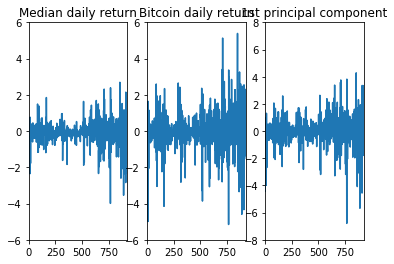

In [232]:
plt.subplot(1,3,3)
ax1 = plt.subplot(1,3,1)
ax1.plot(np.median(X, axis = 0))
plt.xlim(1, 928)
plt.ylim(-6, 6)
plt.title('Median daily return')

ax2 = plt.subplot(1,3,2)
ax2.plot(X[0, : ])
plt.xlim(1, 928)
plt.ylim(-6, 6)
plt.title('Bitcoin daily return')

ax3 = plt.subplot(1,3,3)
ax3.plot(-E1[0]) # 0 is the number of ind
plt.xlim(1, 928)
plt.ylim(-8, 8)
plt.title('1st principal component')

In [219]:
E1[0]

array([ 4.43187104e+00,  1.18020980e-01,  1.26051605e-01, -9.47004274e-01,
        2.46284890e-01, -1.43174701e-01, -2.33139119e-01,  5.80353217e-01,
        3.17870706e-01,  8.70641950e-01,  3.99596168e+00, -1.11370571e+00,
       -1.31006788e+00,  6.39045267e-01,  5.35754877e-01,  6.08516551e-01,
        2.67652700e+00, -3.39595636e-01, -4.00402289e-01,  4.07133486e-01,
       -2.44413070e-01,  1.24587798e-01, -1.09027205e-01,  2.10937478e-01,
        2.38719063e-01,  5.06868051e-01,  6.84267440e-01, -2.82214942e-01,
       -5.24773928e-01, -4.89346066e-01,  4.15867101e-01, -3.06818485e-02,
        6.62076968e-01,  2.81417319e-01,  2.09194837e-01,  6.79727954e-01,
        5.21499955e-01,  4.40352949e-01, -4.27636507e-01,  8.94302989e-02,
        9.47773020e-02, -3.64913508e-02,  3.85981721e-01,  5.42576713e-02,
        5.33711074e-01, -5.95917393e-01,  5.22075959e-01,  1.42975011e-01,
        2.11888395e-01,  3.34512703e-01,  4.08126867e-01, -5.09154195e-02,
        3.13321062e-01,  